# AFD de données générées
Généralisation de deux ensembles de 500 vecteurs chacun dans l'espace 3D suivant une loi normale N(0, 1)

In [1]:
import numpy as np
# matrice de déformation
s1 = np.array([[3, 0, 0], [0, 1, 0], [0, 0, 0.01]])
# matrice de rotation
r1 = np.array([[0.36, 0.48, -0.8], [-0.8, 0.6, 0], [0.48, 0.64, 0.6]])

rndn3d1 = np.random.randn(500, 3)
rndef1 = rndn3d1.dot(s1).dot(r1)

rndn3d2 = np.random.randn(500, 3)
rndef2 = rndn3d2.dot(s1).dot(r1) + [0, 0, 1]

rndef = np.concatenate((rndef1, rndef2))
print rndef.shape

(1000, 3)


## Question
_Expliquer l'addition qui permet de créer rndef2_

 * A quoi sert cette addition? **il s'agit d'un translation sur le troisième axe**
 * quel est le résultat de l’addition entre deux array de dimension différente ? Le vecteur est appliqué sur l'ensemble des n - 1 dimensions

Génération d'étiquettes

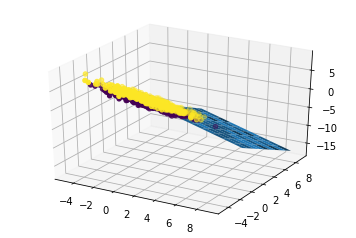

In [28]:
lcls1 = np.ones(500)
lcls2 = 2 * np.ones(500)
lcls = np.concatenate((lcls1, lcls2))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndef[:, 0], rndef[:, 1], rndef[:, 2], c = lcls)

vec = np.array([ 2991.3916837, 3993, 3742])
[xx,yy]=np.meshgrid(range(10), range(10))
d=0
zz = (-vec[0]*xx - vec[1]*yy - d)/vec[2]
ax.plot_surface(xx, yy, zz)
plt.show()

 - Appliquons une analyse discriminante
 - Projetons-les sur l'espace discriminant (de dimension <= 2)

[[ 2991.3916837   3993.39255825  3742.66979825]]
[ 1.]
(1000, 1)


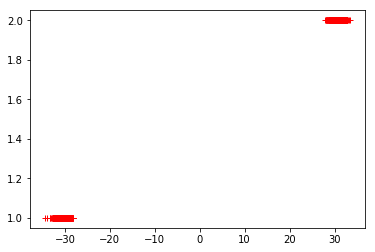

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(rndef, lcls)

print lda.coef_
print lda.explained_variance_ratio_

rndt = lda.transform(rndef)
print rndt.shape
# Pourquoi (1000, 1)? (et pas 2)?

plt.plot(rndt, lcls, 'r+')

plt.show()

(1000, 2)


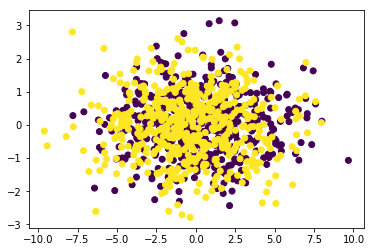

In [27]:
# Réduisons les dimensions des données avec une ACP 
# en conservant les projections sur les deux 
# axes principaux
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(rndef)

rndp = pca.transform(rndef)
print rndp.shape

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(rndp[:,0], rndp[:, 1], c = lcls)
plt.show()

(1000, 1)


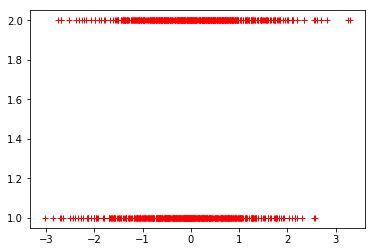

In [29]:
lda = LinearDiscriminantAnalysis()
lda.fit(rndp, lcls)
rndpt = lda.transform(rndp)
print rndpt.shape
plt.plot(rndpt, lcls, 'r+')
plt.show()

## Question
 - Expliquer ce que vous constatez
Dans le cas de l'ACP, on voit que les données ne sont pas linéairement séparables. Le décalage de 1 sur l'axe Z entre les deux distributions a disparu.
Avec l'AFD, on distingue un très net séparation

# ACP et AFD des données "textures"

## Question
Lisez ces données dans un array. Appliquez une ACP et visualisez les projections sur les 3 premiers axes principaux. Enfin, appliquez une AFD et visualisez les projections sur les 3 premiers axes discriminants.

(5500, 40)
[ 2  2  2 ..., 14 14  0]


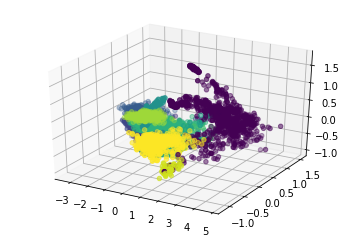

In [48]:
from io import StringIO
texture = np.genfromtxt('texture.dat', usecols=range(40), delimiter=' ', filling_values=0.0)
print texture.shape
pca = PCA(n_components = 3)
pca.fit(texture)

lcls = np.genfromtxt('texture.dat', dtype=int, usecols=(41), delimiter=' ', filling_values=0.0)
print lcls

t = pca.transform(texture)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t[:, 0], t[:, 1], t[:, 2], c = lcls)
plt.show()

(5500, 40)
(5500,)
[ 0.35604998  0.32311394  0.15370789  0.06000181  0.03065955  0.02626406
  0.01952645  0.01665041  0.00798476  0.00414491  0.00189625]


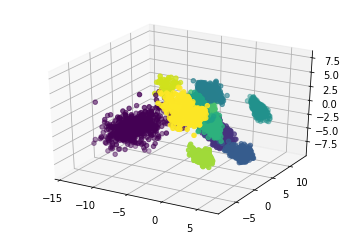

In [50]:
lda = LinearDiscriminantAnalysis()
print texture.shape
print lcls.shape
lda.fit(texture, lcls)

print lda.explained_variance_ratio_

tlda = lda.transform(texture)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tlda[:, 0], tlda[:, 1], tlda[:, 2], c = lcls)
plt.show()

## Question
Faites l’extraction d’une partie des observations avant d’appliquer l’AFD. Réalisez ensuite la prédiction (étape décisionnelle de l’AFD) pour ces observations et affichez l’erreur de prédiction. Pour l’extraction des observations vous pouvez employer (entre autres)

In [70]:
from sklearn.cross_validation import train_test_split

texture = np.genfromtxt('texture.dat', usecols=range(42), delimiter=' ', filling_values=0.0)

train, test = train_test_split(texture, test_size = 0.2)

lcls = train[:, 41]
lda.fit(train[:, :40], lcls.astype(dtype=int))

lcls = test[:, 41]
print "Erreur de prediction = ", 1 - lda.score(test[:, :40], lcls.astype(dtype=int))


Erreur de prediction =  0.0281818181818


# AFD des données « feuilles »

[[  1.00000000e+00   1.00000000e+00   7.26940000e-01   1.47420000e+00
    3.23960000e-01   9.85350000e-01   1.00000000e+00   8.35920000e-01
    4.65660000e-03   3.94650000e-03   4.77900000e-02   1.27950000e-01
    1.61080000e-02   5.23230000e-03   2.74770000e-04   1.17560000e+00]
 [  1.00000000e+00   2.00000000e+00   7.41730000e-01   1.52570000e+00
    3.61160000e-01   9.81520000e-01   9.98250000e-01   7.98670000e-01
    5.24230000e-03   5.00160000e-03   2.41600000e-02   9.04760000e-02
    8.11950000e-03   2.70800000e-03   7.48460000e-05   6.96590000e-01]]


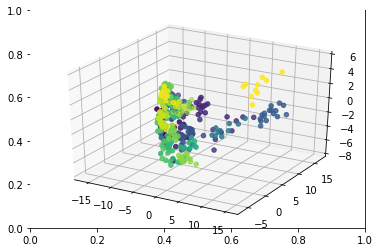

In [61]:
from io import StringIO
leaf = np.loadtxt('leaf.csv', delimiter=',')
print leaf[:2, :]

lda = LinearDiscriminantAnalysis()
lda.fit(leaf[:,1:],leaf[:,0])

leafl = lda.transform(leaf[:,1:])
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(leafl[:,0],leafl[:,1],leafl[:,2],c=leaf[:,0])
plt.show()

## Question
 - Comparez les résultats avec ceux de l’ACP.

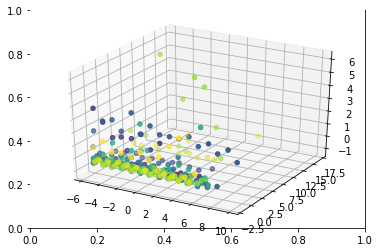

In [62]:
pca = PCA(n_components = 3)

pca.fit(leaf[:,1:],leaf[:,0])

leafl = pca.transform(leaf[:,1:])
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(leafl[:,0],leafl[:,1],leafl[:,2],c=leaf[:,0])
plt.show()

## Question
 - Faites l’extraction d’une partie des observations avant d’appliquer l’AFD. Réalisez ensuite la prédiction (étape décisionnelle de l’AFD) pour ces observations et affichez l’erreur de prédiction.

In [63]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(leaf, test_size = 0.2)
lda.fit(train[:,1:], train[:,0])
print "Erreur de prediction = ", 1 - lda.score(train[:,1:], train[:,0])

Erreur de prediction =  0.132352941176
